<a href="https://colab.research.google.com/github/YopaNelly/AI-ML-Basics/blob/main/Amazon_employee_acces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /content/amazon-employee-access-challenge.zip

Archive:  /content/amazon-employee-access-challenge.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/train.csv')
df.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [5]:
df.isnull().sum()

,0
ACTION,0
RESOURCE,0
MGR_ID,0
ROLE_ROLLUP_1,0
ROLE_ROLLUP_2,0
ROLE_DEPTNAME,0
ROLE_TITLE,0
ROLE_FAMILY_DESC,0
ROLE_FAMILY,0
ROLE_CODE,0


In [6]:
df.shape

(32769, 10)

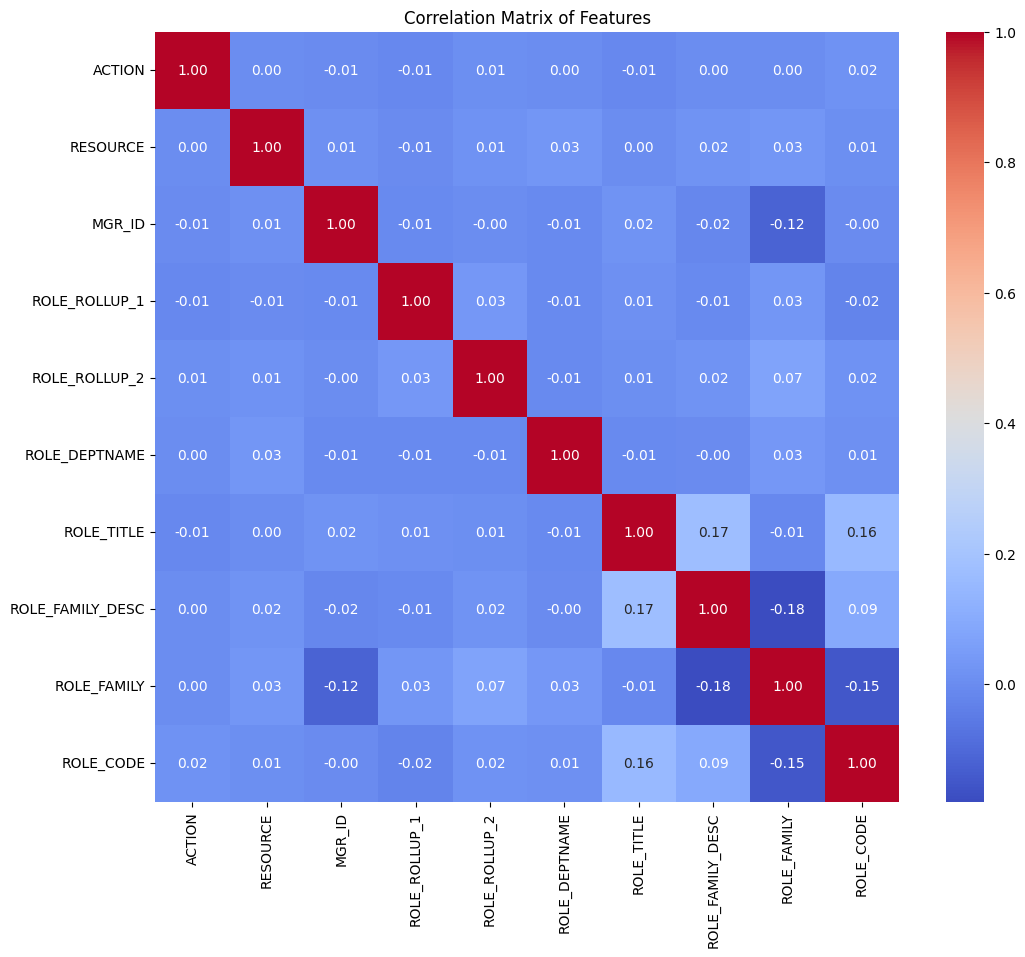

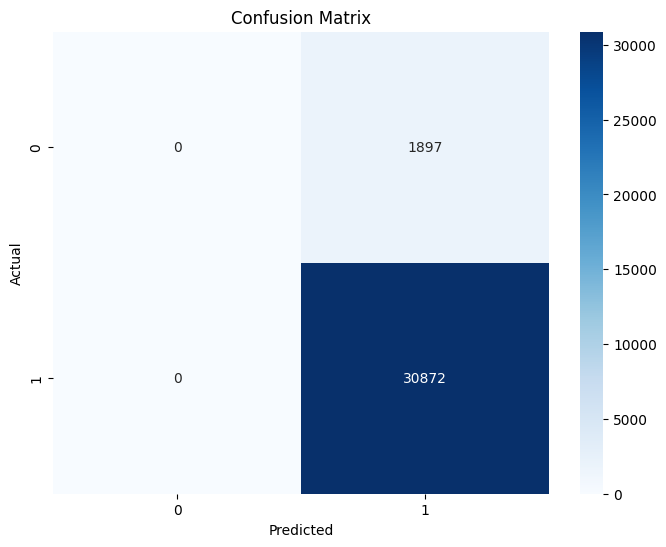

In [7]:
# prompt: find the correlations between each column and draw a confusion matrix

# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# Confusion matrix (requires target variable and model predictions)
# Assuming 'ACTION' is the target variable and you have a model
# Replace with your actual target variable and model predictions

# Example using a dummy classifier for demonstration purposes
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix

# Split into features (X) and target (y)
X = df.drop('ACTION', axis=1)
y = df['ACTION']


# Create a dummy classifier for demonstration
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
y_pred = dummy_clf.predict(X)

cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [8]:
# prompt: normalise all other column except ACTION

# Normalize all columns except 'ACTION'
from sklearn.preprocessing import MinMaxScaler

# Separate features (X) and target variable (y)
X = df.drop('ACTION', axis=1)
y = df['ACTION']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Concatenate the scaled features with the target variable
df_normalized = pd.concat([X_scaled_df, y], axis=1)

# Display the normalized DataFrame
print(df_normalized.head())


   RESOURCE    MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
0  0.126070  0.274167       0.370395       0.359379       0.421093   
1  0.055047  0.004861       0.370395       0.359543       0.419863   
2  0.117647  0.046305       0.371236       0.359075       0.401286   
3  0.115761  0.017233       0.370395       0.359543       0.408762   
4  0.136728  0.018866       0.370291       0.357972       0.407259   

   ROLE_TITLE  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  ACTION  
0    0.000134          0.368604     0.942199   0.000183       1  
1    0.003387          0.370655     1.000000   0.004313       1  
2    0.000000          0.857045     0.054318   0.000000       1  
3    0.002278          0.769253     0.942199   0.002892       1  
4    0.007444          0.388220     0.054553   0.009456       1  


In [9]:
# find the correlation between all the columns with ACTION

correlations = df.corr()['ACTION'].drop('ACTION') # Drop self-correlation
correlations


,ACTION
RESOURCE,0.000185
MGR_ID,-0.005167
ROLE_ROLLUP_1,-0.013702
ROLE_ROLLUP_2,0.005179
ROLE_DEPTNAME,0.001025
ROLE_TITLE,-0.010169
ROLE_FAMILY_DESC,0.003565
ROLE_FAMILY,0.000502
ROLE_CODE,0.017147


In [10]:
correlation = df_normalized.corr()["ACTION"].drop("ACTION")
correlation

,ACTION
RESOURCE,0.000185
MGR_ID,-0.005167
ROLE_ROLLUP_1,-0.013702
ROLE_ROLLUP_2,0.005179
ROLE_DEPTNAME,0.001025
ROLE_TITLE,-0.010169
ROLE_FAMILY_DESC,0.003565
ROLE_FAMILY,0.000502
ROLE_CODE,0.017147


In [11]:
df.describe()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
count,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000
mean,0.942110,42923.916171,25988.957979,116952.627788,118301.823156,118912.779914,125916.152644,170178.369648,183703.408893,119789.430132
std,0.233539,34173.892702,35928.031650,10875.563591,4551.588572,18961.322917,31036.465825,69509.462130,100488.407413,5784.275516
min,0.000000,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000
25%,1.000000,20299.000000,4566.000000,117961.000000,118102.000000,118395.000000,118274.000000,117906.000000,118363.000000,118232.000000
50%,1.000000,35376.000000,13545.000000,117961.000000,118300.000000,118921.000000,118568.000000,128696.000000,119006.000000,118570.000000
75%,1.000000,74189.000000,42034.000000,117961.000000,118386.000000,120535.000000,120006.000000,235280.000000,290919.000000,119348.000000
max,1.000000,312153.000000,311696.000000,311178.000000,286791.000000,286792.000000,311867.000000,311867.000000,308574.000000,270691.000000


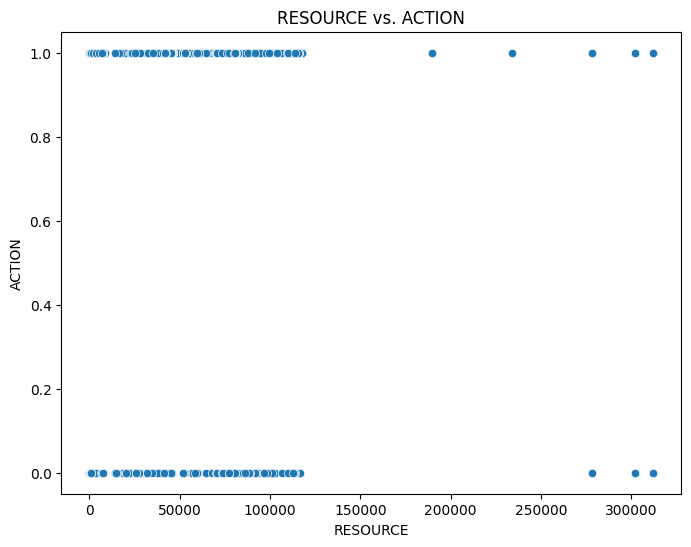

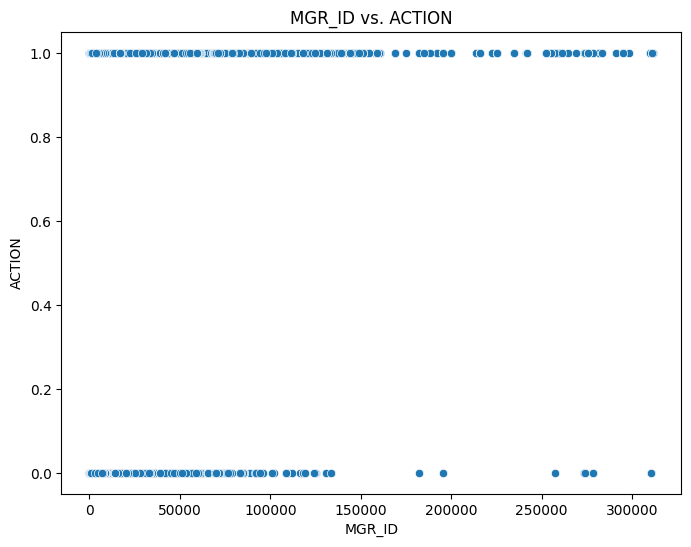

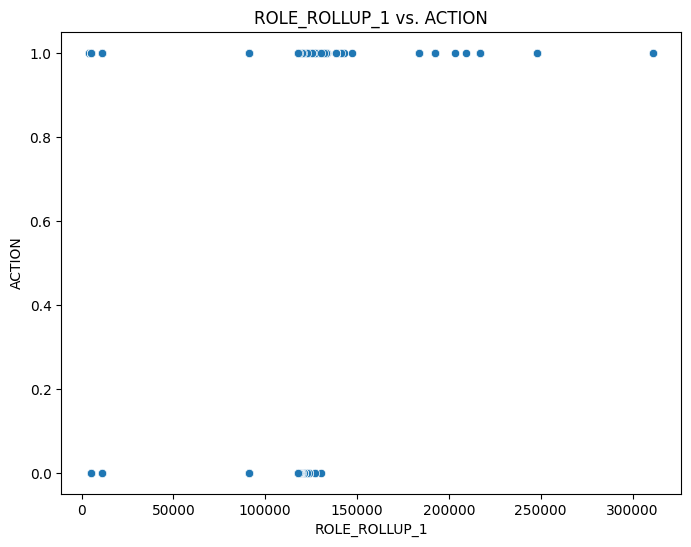

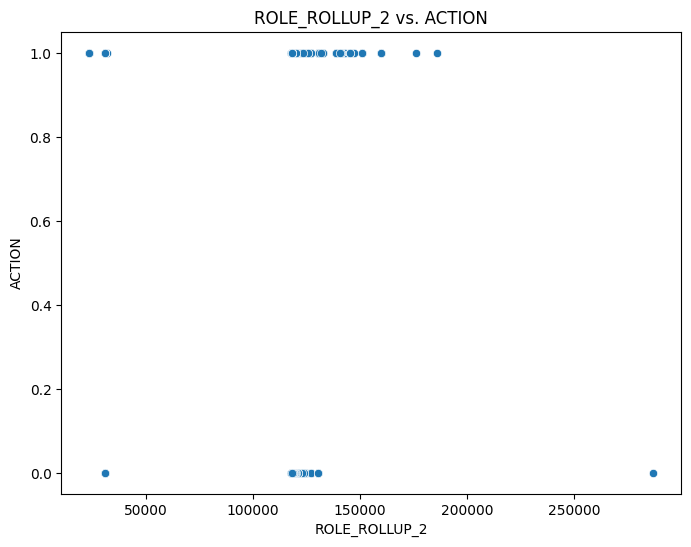

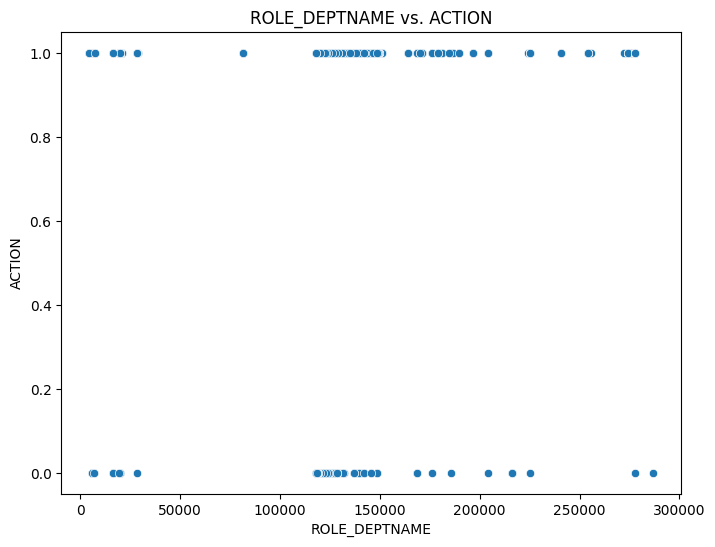

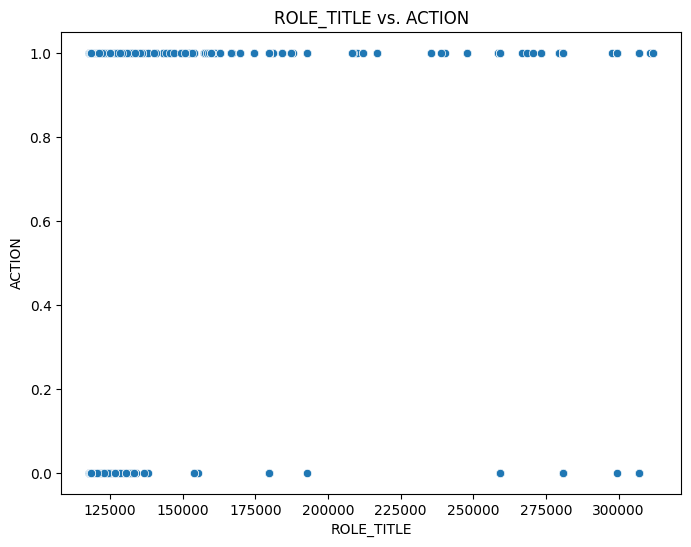

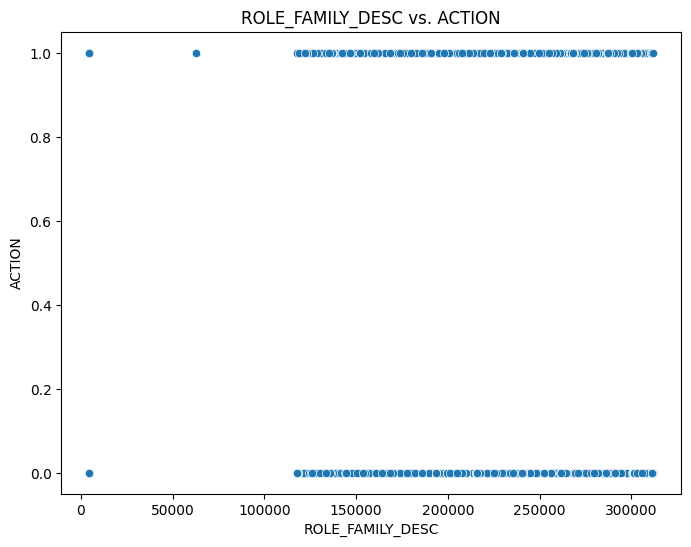

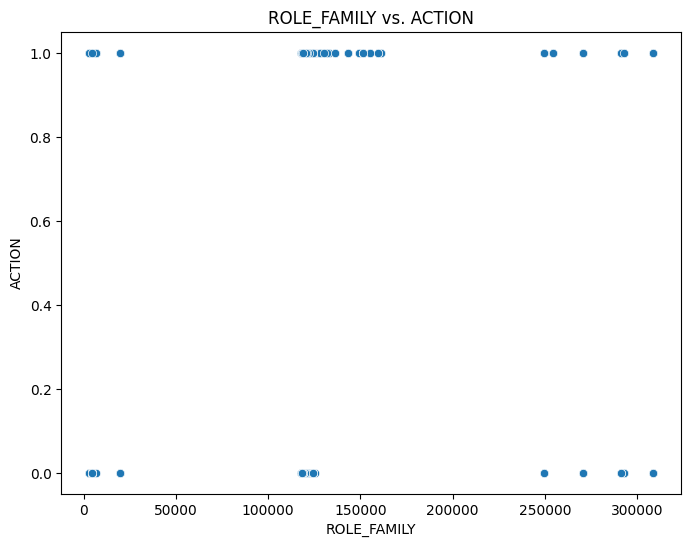

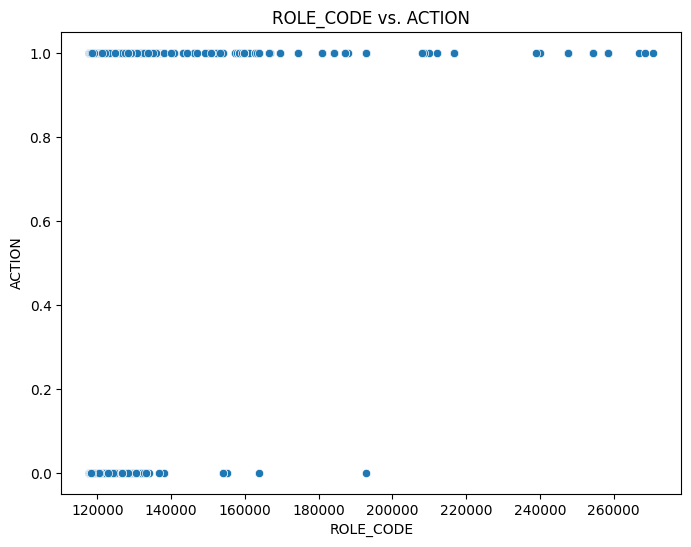

In [12]:
# Plotting each column against 'ACTION'
for column in df.columns:
    if column != 'ACTION':
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=column, y='ACTION', data=df)
        plt.title(f'{column} vs. ACTION')
        plt.xlabel(column)
        plt.ylabel('ACTION')
        plt.show()


In [13]:
# prompt: split the data in to train and test

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42) # Adjust test_size as needed

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (26215, 9)
X_test shape: (6554, 9)
y_train shape: (26215,)
y_test shape: (6554,)


In [14]:
# prompt: do a linear regression with all other column as features and ACTION as target

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.0531173649012835
R-squared: 0.00026861583734505423


In [15]:
# prompt: make prediction on the test set and output it on a table form with actual value and predicted

# Create a DataFrame for the results
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the table
results_df


,Actual,Predicted
18245,1,0.937500
9226,1,0.940199
27195,1,0.942044
6478,1,0.938966
4813,1,0.947171
...,...,...
27818,1,0.948375
6867,1,0.947197
20001,0,0.940805
20564,1,0.943687


In [16]:
# prompt: change the prediction stile so that if prediction is >= 0.5 the predicted values should be 1 and if the predicted in <0.5 the predicted value should be 0

# Apply the threshold to the predictions
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)

# Create a DataFrame for the results with the binary predictions
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_binary})

# Display the table
print(results_df)

# Now you can use y_pred_binary for further analysis or evaluation
# For example, you can calculate a new confusion matrix:
cm_binary = confusion_matrix(y_test, y_pred_binary)
cm_binary


       Actual  Predicted
18245       1          1
9226        1          1
27195       1          1
6478        1          1
4813        1          1
...       ...        ...
27818       1          1
6867        1          1
20001       0          1
20564       1          1
22437       1          1

[6554 rows x 2 columns]


array([[   0,  369],
       [   0, 6185]])

In [17]:
cm_binary = confusion_matrix(y_test, y_pred_binary)
cm_binary

array([[   0,  369],
       [   0, 6185]])

In [18]:
# prompt: do a logistic regression with all other column as features and ACTION as target  it should aout put 0 or 1 as predicted value

from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logreg_model = LogisticRegression(solver='liblinear') # Use a suitable solver

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)

# Create a DataFrame for the results
results_df_logreg = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_logreg})

# Display the table
print(results_df_logreg)

# Evaluate the model (example: confusion matrix)
from sklearn.metrics import confusion_matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_logreg


       Actual  Predicted
18245       1          1
9226        1          1
27195       1          1
6478        1          1
4813        1          1
...       ...        ...
27818       1          1
6867        1          1
20001       0          1
20564       1          1
22437       1          1

[6554 rows x 2 columns]


array([[   0,  369],
       [   0, 6185]])

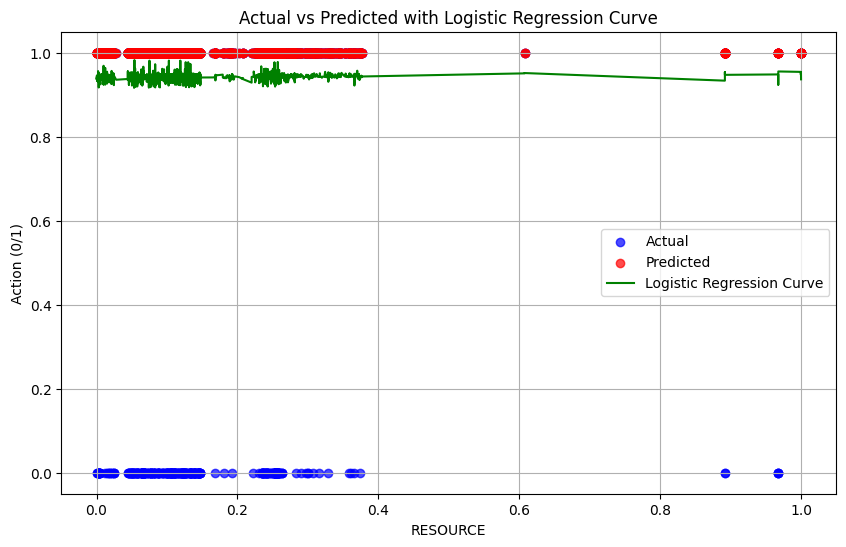

In [19]:
# prompt: plot a visual to see actual vs predicted in a scatter plot with line show the logistic regression curve

import matplotlib.pyplot as plt

# Assuming X_test is a DataFrame or a NumPy array with a single feature
# and y_test and y_pred_logreg are your actual and predicted values
# If X_test has multiple features, select one for the plot


# Example using the first feature if X_test is a DataFrame
if isinstance(X_test, pd.DataFrame):
    feature_name = X_test.columns[0]  # Replace with the desired feature
    x_values = X_test[feature_name]
else:
    feature_name = "Feature"  # Generic name if X_test is a NumPy array
    x_values = X_test[:,0]


plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_test, label='Actual', color='blue', alpha=0.7)
plt.scatter(x_values, y_pred_logreg, label='Predicted', color='red', alpha=0.7)


# Create the logistic regression curve (requires probabilities)
# Get predicted probabilities
y_pred_prob = logreg_model.predict_proba(X_test)[:, 1]

# Sort the values and probabilities for the line plot
sorted_indices = np.argsort(x_values)
x_sorted = x_values.iloc[sorted_indices]  # Use iloc for Series
y_prob_sorted = y_pred_prob[sorted_indices]

plt.plot(x_sorted, y_prob_sorted, color='green', label='Logistic Regression Curve')

plt.xlabel(feature_name)
plt.ylabel('Action (0/1)')
plt.title('Actual vs Predicted with Logistic Regression Curve')
plt.legend()
plt.grid(True)
plt.show()
